# Stroke Prediciton using Machine Learning

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Data Pre-Processing¶

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
dfVisualization = df

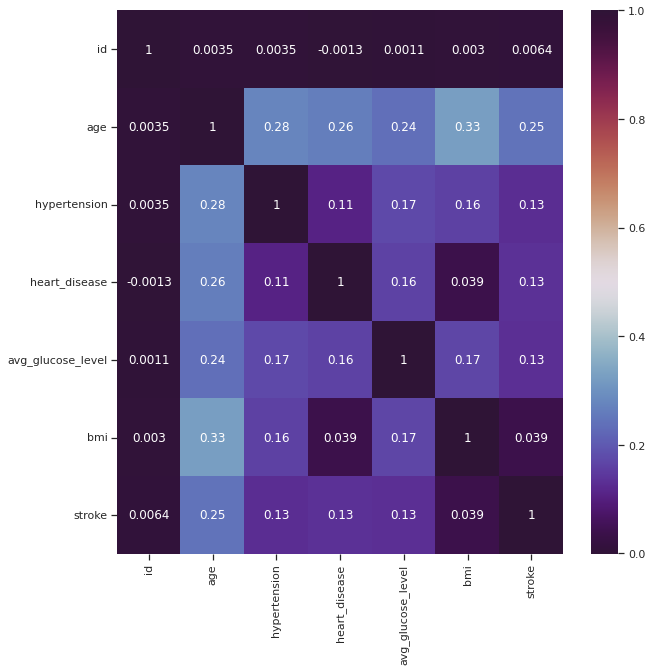

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='twilight_shifted')
plt.show()

In [ ]:
cor = df.corr()
cor

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


Need to remove ID as it has nothing to do with the prediction of stroke

In [ ]:
df = df.drop(['id'],axis = 1)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

we will remove others to make it binary for encoding later which will helps us in model training.

In [ ]:
df = df[df.gender !='Other']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### Binary Encoding:

Columns like gender, ever_married, and residence type need binary coding as only two types of values are available there. We need to change it to 0 and 1. 

In [ ]:
BinaryCol = ['gender', 'ever_married', 'Residence_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

In [ ]:
def label_encoder(df, binary_col):
    labelencoder = LabelEncoder()
    df[binary_col] = labelencoder.fit_transform(df[binary_col])
    return df

In [ ]:
for column in BinaryCol:
    label_encoder(df, column)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


### Data Manipulation

Data manipulation is an important steps for better model accuracy. 

In [ ]:
df = pd.get_dummies(df, columns = ['work_type', 'smoking_status'], drop_first = True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0


#### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ScalingCol = ['age','avg_glucose_level','bmi']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
for col in ScalingCol:
    df[col] = scaler.fit_transform(df[[col]])
    

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.301260,1,0,1,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,0.212981,1,0,0,1,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,0.254296,1,0,1,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,0.276060,1,0,1,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,0.156930,1,0,0,1,0,0,1,0


## Data Visualization

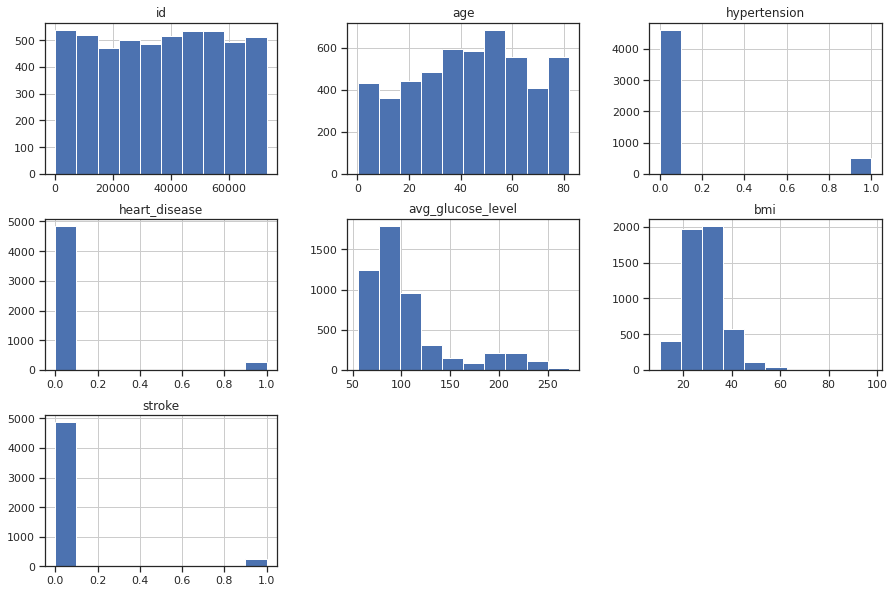

In [ ]:
dfVisualization.hist(figsize = (15,10))
plt.show()

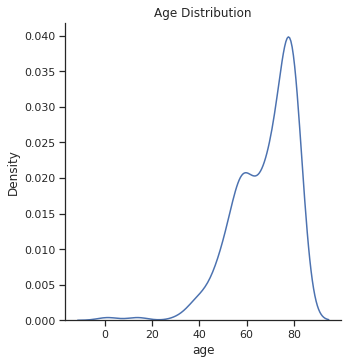

In [ ]:
stroke = dfVisualization[dfVisualization['stroke']==1]
sns.displot(stroke.age, kind='kde')
plt.title("Age Distribution")
plt.show()

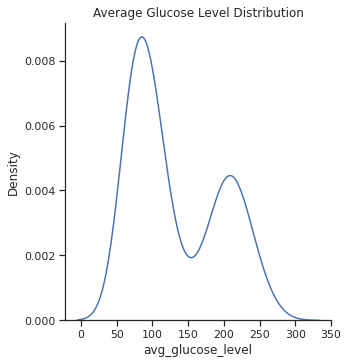

In [ ]:
stroke = dfVisualization[dfVisualization['stroke']==1]
sns.displot(stroke.avg_glucose_level, kind='kde')
plt.title("Average Glucose Level Distribution")
plt.show()

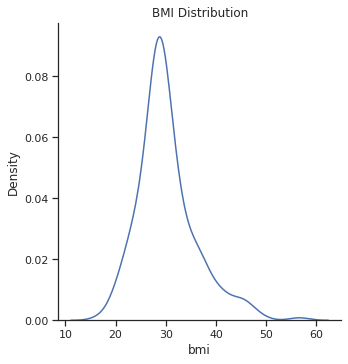

In [ ]:
stroke = dfVisualization[dfVisualization['stroke']==1]
sns.displot(stroke.bmi, kind='kde')
plt.title("BMI Distribution")
plt.show()

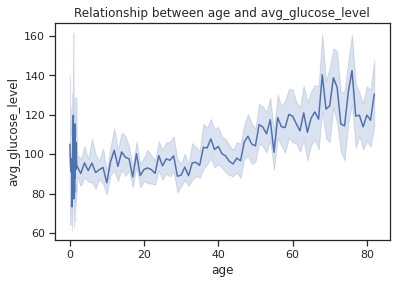

In [ ]:
plt.figure()
sns.lineplot(dfVisualization['age'], dfVisualization['avg_glucose_level'])
plt.title("Relationship between age and avg_glucose_level")
plt.show()

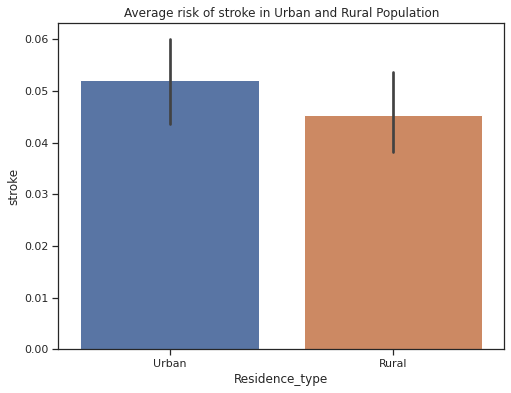

In [ ]:
#dfVisualization.groupby('Residence_type')['stroke'].sum().plot(kind = 'bar')
plt.figure(figsize=[8,6])
sns.barplot(x = 'Residence_type', y = 'stroke' , data = dfVisualization)
plt.title("Average risk of stroke in Urban and Rural Population")
plt.show()

Distribution of Smoking Status

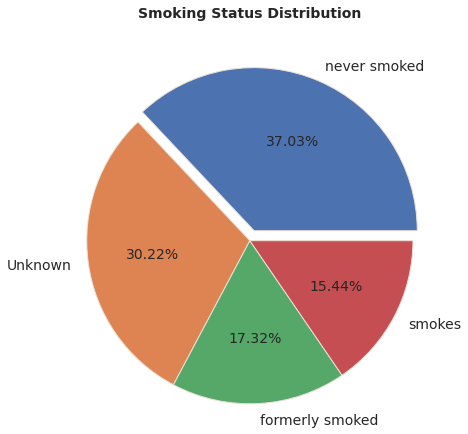

In [ ]:
smoking_status = dfVisualization['smoking_status'].value_counts()
fig, ax = plt.subplots(figsize =(8, 5))
ax.pie(x=smoking_status, autopct="%.2f%%", labels=smoking_status.index, explode=[0.10,0,0,0],radius=1.5, wedgeprops={ 'linewidth' : 1, 'edgecolor' : '#EAE0D5' }, textprops=dict(fontsize=14))
ax.set_title('Smoking Status Distribution', y=1.3, weight='bold', fontsize=14)
plt.show()

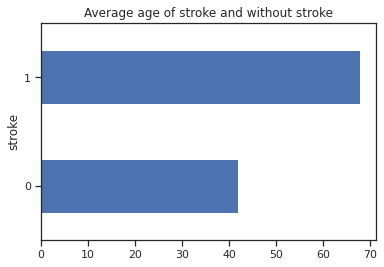

In [ ]:
plt.figure()
dfVisualization.groupby('stroke')['age'].mean().plot(kind = 'barh')
plt.title("Average age of stroke and without stroke")
plt.show()

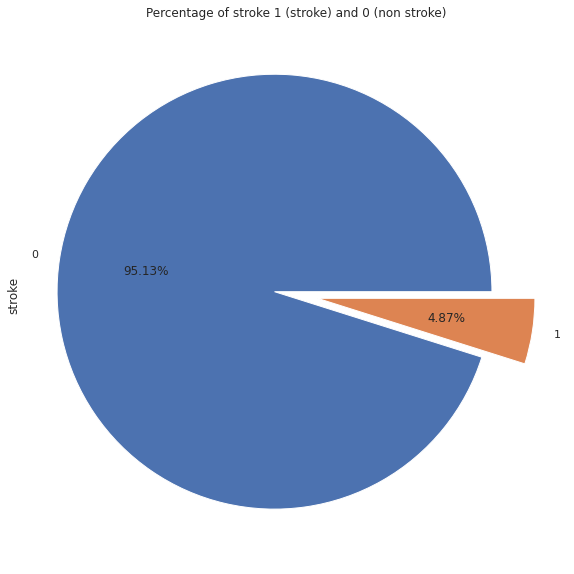

In [ ]:
plt.figure(figsize = [10,10])
dfVisualization.groupby('stroke')['stroke'].count().plot(kind = 'pie',autopct="%.2f%%",explode=[0.10,0.10])
plt.title("Percentage of stroke 1 (stroke) and 0 (non stroke)")
plt.show()

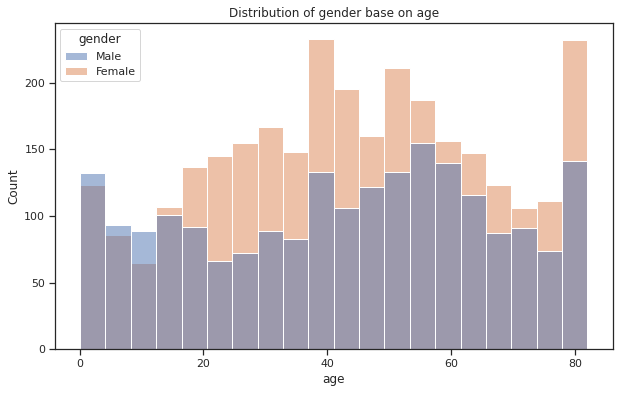

In [ ]:
dfVis = dfVisualization[dfVisualization['gender']!='Other']
sns.set_theme(style = 'ticks')
plt.figure(figsize=(10,6))
sns.histplot(data=dfVis,x="age",hue="gender")
plt.title("Distribution of gender base on age")
plt.show()

In [ ]:
df.groupby('stroke')['stroke'].count()

stroke
0    4860
1     249
Name: stroke, dtype: int64

## Machine Learning

Four differnt kind of machine learning models will be used to for stroke prediciton. The first step is is to balance the class and then train models

### Remove Class Imbalanacing

Data Balancing using SMOTE :

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
Fre1 = df.drop('stroke', axis = 1)
Tem1 = df['stroke']

STP = [('under', under),('over', over)]
pipeline = Pipeline(steps=STP)
Fre1, Tem1 = pipeline.fit_resample(Fre1, Tem1)
Counter(Tem1)

Counter({0: 2490, 1: 2490})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Fre1, Tem1, test_size = 0.15, random_state = 2)

In [ ]:
Tem1.to_frame().value_counts()

stroke
0         2490
1         2490
dtype: int64



## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)
predicted = (predicted>0.5)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

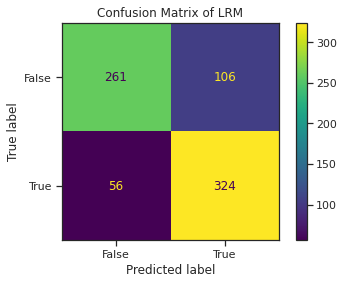

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix of LRM")
plt.show() 

In [ ]:
score = model.score(X_test,y_test)
print('Test Accuracy is', round(score*100,2),"%")

Test Accuracy is 39.03 %


### Logistic Regression (Alternative of Linear)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = LogisticRegression().fit(X_train, y_train)
predicted = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

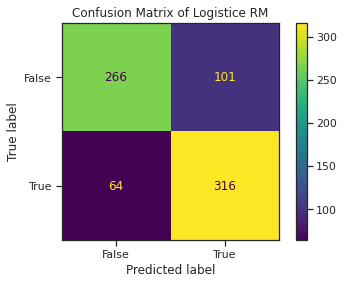

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix of Logistice RM")
plt.show() 

In [ ]:
score = model.score(X_test,y_test)
print('Test Accuracy is', round(score*100,2),"%")

Test Accuracy is 77.91 %


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Fitting the Decision Tree Regressor
decisionTreeRegressor = DecisionTreeClassifier(random_state = 0)
decisionTreeRegressor.fit(X_train, y_train)

# Predicting on the test dataset using the trained model
y_pred = decisionTreeRegressor.predict(X_test)

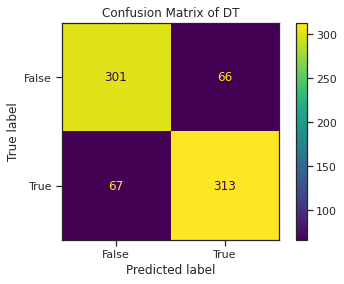

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix of DT")
plt.show() 

In [ ]:
confusion_matrix

array([[301,  66],
       [ 67, 313]])

In [ ]:
score = decisionTreeRegressor.score(X_test,y_test)
print('Test Accuracy is', round(score*100,2),"%")

Test Accuracy is 82.2 %


### Convolution Neural Network


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D

In [ ]:
DfNuralNetwork = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))


In [ ]:
DfNuralNetwork.drop(['id'],axis = 1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
DfNuralNetwork['gender']=encoder.fit_transform(DfNuralNetwork['gender'])
DfNuralNetwork['ever_married']=encoder.fit_transform(DfNuralNetwork['ever_married'])
DfNuralNetwork['work_type']=encoder.fit_transform(DfNuralNetwork['work_type'])
DfNuralNetwork['Residence_type']=encoder.fit_transform(DfNuralNetwork['Residence_type'])
DfNuralNetwork['smoking_status']=encoder.fit_transform(DfNuralNetwork['smoking_status'])
DfNuralNetwork['bmi']=encoder.fit_transform(DfNuralNetwork['bmi'].astype(str))
DfNuralNetwork['age']=encoder.fit_transform(DfNuralNetwork['age'])
DfNuralNetwork['avg_glucose_level']=encoder.fit_transform(DfNuralNetwork['avg_glucose_level'])

In [ ]:
x = DfNuralNetwork.drop('stroke', axis = 1)
y = DfNuralNetwork['stroke']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# Create Model
model=Sequential()

#model.add(Conv1D(64,(3)))
# Input layer Layer
model.add(Dense(32,activation='relu',input_dim=11))

# Hidden Layer
model.add(Dense(16,activation='relu'))

# Outout Layer
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=5,epochs=5)

Epoch 1/5
818/818 [==============================] - 2s 2ms/step - loss: 25.5424 - accuracy: 0.8921
Epoch 2/5
818/818 [==============================] - 2s 2ms/step - loss: 16.6570 - accuracy: 0.9036
Epoch 3/5
818/818 [==============================] - 1s 2ms/step - loss: 14.0100 - accuracy: 0.9017
Epoch 4/5
818/818 [==============================] - 2s 2ms/step - loss: 12.3972 - accuracy: 0.8995
Epoch 5/5
818/818 [==============================] - 2s 2ms/step - loss: 13.2447 - accuracy: 0.9002


In [ ]:
eval_model=model.evaluate(X_train,y_train)
eval_model

128/128 [==============================] - 0s 1ms/step - loss: 8.4697 - accuracy: 0.9511


[8.469746589660645, 0.951076328754425]

## Imporved Accuracy

Intead of using all columns, only few more correlated columns will be used for model training. 

In [ ]:
cor = df.corr()
CorCol = cor[abs(cor['stroke'])>0.1].index
print("Most Correlated Columns are : = \n", CorCol)

Most Correlated Columns are : = 
 Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'stroke'],
      dtype='object')


In [ ]:
dfCorelated = df[['age', 'hypertension', 'heart_disease', 'ever_married','avg_glucose_level', 'stroke']]
dfCorelated

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,0.816895,0,1,1,0.801265,1
1,0.743652,0,0,1,0.679023,1
2,0.975586,0,1,1,0.234512,1
3,0.597168,0,0,1,0.536008,1
4,0.963379,1,0,1,0.549349,1
...,...,...,...,...,...,...
5105,0.975586,1,0,1,0.132167,0
5106,0.987793,0,0,1,0.323516,0
5107,0.426270,0,0,1,0.128658,0
5108,0.621582,0,0,1,0.513203,0


## Class Balancing

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
Fre1 = dfCorelated.drop('stroke', axis = 1)
Tem1 = dfCorelated['stroke']

STP = [('under', under),('over', over)]
pipeline = Pipeline(steps=STP)
Fre1, Tem1 = pipeline.fit_resample(Fre1, Tem1)
Counter(Tem1)

Counter({0: 2490, 1: 2490})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Fre1, Tem1, test_size = 0.15, random_state = 2)

In [ ]:
X_train

,age,hypertension,heart_disease,ever_married,avg_glucose_level
1815,0.267578,0,0,0,0.148324
307,0.792480,0,0,1,0.574970
4974,0.741921,0,1,1,0.248683
2937,0.987793,0,0,1,0.186606
2637,0.951172,0,0,1,0.056181
...,...,...,...,...,...
3335,0.925646,1,0,1,0.860631
1099,0.194336,0,0,0,0.185855
2514,0.865723,0,0,1,0.220432
3606,0.768066,0,0,1,0.693292


### Improved Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)
predicted = (predicted>0.5)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

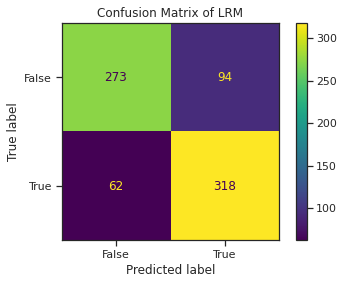

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix of LRM")
plt.show() 

In [ ]:
score = model.score(X_test,y_test)
print('Test Accuracy is', round(score*100,2),"%")

Test Accuracy is 40.25 %


### Improved Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = LogisticRegression().fit(X_train, y_train)
predicted = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

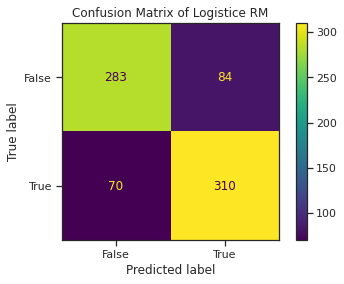

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix of Logistice RM")
plt.show() 

In [ ]:
score = model.score(X_test,y_test)
print('Test Accuracy is', round(score*100,2),"%")

Test Accuracy is 79.38 %


### Improved Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Fitting the Decision Tree Regressor
decisionTreeRegressor = DecisionTreeClassifier(random_state = 0)
decisionTreeRegressor.fit(X_train, y_train)

# Predicting on the test dataset using the trained model
y_pred = decisionTreeRegressor.predict(X_test)

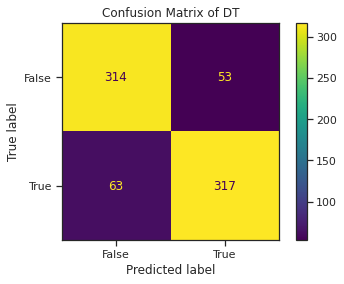

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix of DT")
plt.show() 

In [ ]:
score = decisionTreeRegressor.score(X_test,y_test)
print('Test Accuracy is', round(score*100,2),"%")

Test Accuracy is 84.47 %
